In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [30]:
all_countries = ['United States', 'United Kingdom', 'Argentina', 'Australia', 'Austria', 'Belarus', 'Belgium', 'Bolivia', 'Brazil', 'Bulgaria', 'Canada', 
                 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Finland', 
                 'France', 'Germany', 'Greece', 'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 
                 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Pakistan', 'Panama', 
                 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Saudi Arabia', 'Singapore', 'Slovakia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 
                 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates', 'Uruguay', 'Venezuela', 'Vietnam']

In [8]:
# labels

id2label = ["admiration", "amusement", "anger", "annoyance", "approval", "caring", "confusion", "curiosity", "desire", "disappointment", "disapproval", "disgust", "embarrasment", "excitement", "fear", "gratitude", "grief", "joy", "love", "nervousness", "optimism", "pride", "realization", "relief", "remorse", "sadness", "surprise", "neutral"]
label2id = {}
for i, label in enumerate(id2label):
    label2id[label] = i

In [5]:
usa_df = pd.read_csv("data/emotions/emotions_United States.csv")
usa_df = usa_df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)

usa_df

,artist_title,lyrics,emotions
0,Post Malone - Sunflower - Spider-Man: Into the...,2 ContributorsPost Malone Essentials Lyrics1. ...,"[['neutral'], ['neutral'], ['neutral'], ['neut..."
1,J. Cole - No Role Modelz,403 ContributorsTranslationsEspañolРусскийEngl...,"[['caring', 'neutral'], ['neutral'], ['admirat..."
2,Juice WRLD - Lucid Dreams,528 ContributorsTranslationsTürkçeРусскийRomân...,"[['neutral'], ['disapproval'], ['disapproval']..."
3,Lil Uzi Vert - XO TOUR Llif3,560 ContributorsTranslationsРусскийPortuguêsIt...,"[['caring'], ['caring', 'relief'], ['approval'..."
4,Post Malone - rockstar,478 ContributorsTranslationsEspañolPolskiFranç...,"[['amusement'], ['neutral'], ['neutral'], ['an..."
...,...,...,...
95,"Ariana Grande - thank u, next",401 ContributorsTranslationsTürkçeSvenskaEspañ...,"[['neutral'], ['disapproval'], ['approval', 'n..."
96,Eslabon Armado - Ella Baila Sola,3 ContributorsElla Baila Sola (RayBurger Remix...,"[['curiosity', 'neutral'], ['neutral'], ['exci..."
97,BlocBoy JB - Look Alive,"247 ContributorsLook Alive Lyrics\nTay Keith, ...","[['anger'], ['joy', 'neutral'], ['excitement',..."
98,Marshmello - Happier,257 ContributorsTranslationsEspañolไทย / Phasa...,"[['neutral'], ['desire'], ['neutral'], ['neutr..."


In [22]:
l = ast.literal_eval(usa_df.iloc[1]["emotions"])

l

[['caring', 'neutral'],
 ['neutral'],
 ['admiration'],
 ['anger', 'annoyance', 'caring'],
 ['realization', 'neutral'],
 ['neutral'],
 ['sadness'],
 ['neutral'],
 ['joy', 'neutral'],
 ['neutral'],
 ['neutral'],
 ['joy', 'neutral'],
 ['disapproval', 'neutral'],
 ['disapproval', 'neutral'],
 ['disapproval', 'neutral'],
 ['disapproval', 'neutral'],
 ['approval', 'neutral'],
 ['neutral'],
 ['neutral'],
 ['disgust'],
 ['anger', 'disapproval', 'disgust'],
 ['neutral'],
 ['remorse', 'neutral'],
 ['neutral'],
 ['neutral'],
 ['neutral'],
 ['annoyance', 'neutral'],
 ['neutral'],
 ['realization'],
 ['neutral'],
 ['anger', 'annoyance'],
 ['neutral'],
 ['confusion', 'neutral'],
 ['joy', 'neutral'],
 ['neutral'],
 ['neutral'],
 ['joy', 'neutral'],
 ['disapproval', 'neutral'],
 ['disapproval', 'neutral'],
 ['disapproval', 'neutral'],
 ['disapproval', 'neutral'],
 ['desire', 'love'],
 ['love', 'optimism', 'neutral'],
 ['love', 'neutral'],
 ['neutral'],
 ['annoyance', 'disapproval'],
 ['neutral'],
 ['ne

In [24]:
def aggregate_emotions(emotions): 
    """
    Aggregates emotions to create a distribution vector of emotions.

    input:
        emotions: a list of emotions. each emotion is a list representing the emotions of the sentence. all the sentences represent the song
    """
    
    temp = [0] * len(id2label)
    for sentence in emotions:
        for emotion in sentence:
            temp[label2id[emotion]] += 1

    temp = np.array(temp)

    # normalize
    temp = temp / len(emotions)

    return temp

In [25]:
def aggregate_emotions_no_neutral(emotions):
    """
    Aggregates emotions to create a distribution vector of emotions.
    Doesn't count neutral as an emotion.

    For songs with only neutral sentences, return the zero vector.
    """

    total_count = 0

    temp = [0] * (len(id2label) - 1)
    for sentence in emotions:
        flag = False
        for emotion in sentence:
            if emotion != "neutral":
                temp[label2id[emotion]] += 1
                if not flag:
                    flag = True
                    total_count += 1

    temp = np.array(temp)

    if total_count == 0:
        return temp
    else:
        # normalize
        temp = temp / total_count
        return temp

In [28]:
aggregate_emotions_no_neutral(l)

array([0.01666667, 0.01666667, 0.11666667, 0.16666667, 0.01666667,
       0.03333333, 0.03333333, 0.        , 0.03333333, 0.        ,
       0.36666667, 0.03333333, 0.05      , 0.        , 0.        ,
       0.        , 0.        , 0.1       , 0.05      , 0.        ,
       0.01666667, 0.        , 0.03333333, 0.        , 0.08333333,
       0.03333333, 0.        ])

In [29]:
gdp_df = pd.read_csv("gdp_per_capita.csv")

gdp_df

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
0,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,611.268,423.993,422.229,no data,no data,no data,no data,no data,no data,no data
1,Albania,728.359,817.734,824.542,815.529,788.332,788.801,855.724,832.245,805.046,...,5278.986,6259.762,6657.637,7956.559,8924.317,9474.065,10135.055,10827.923,11578.584,12389.74
2,Algeria,2462.085,2502.13,2446.588,2514.256,2640.191,2988.545,2929.092,2935.816,2326.571,...,3757.585,4169.984,4981.822,5323.635,5721.678,5869.435,5998.622,6073.858,6129.969,6170.756
3,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,36973.845,41806.876,41378.881,43784.571,44899.596,45570.14,46093.258,46597.511,47098.423,47563.642
4,Angola,802.627,731.427,712.576,723.654,747.325,817.068,743.735,828.958,875.526,...,1709.283,2169.648,3439.391,2565.912,2431.58,2444.365,2455.711,2528.702,2571.26,2617.815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Major advanced economies (G7),11275.803,11554.398,11436.111,12005.038,12568.159,13252.936,15946.884,18227.138,20367.02,...,50839.174,55977.766,57110.146,60221.173,62412.739,64658.942,67067.991,69485.17,72050.992,74590.436
224,Middle East and Central Asia,2108.544,2179.306,2101.667,2075.924,2039.69,2041.836,2023.437,2329.576,2385.981,...,4090.533,4721.043,5542.042,5582.4,5744.87,5887.207,6124.102,6384.882,6637.653,6908.869
225,Other advanced economies,6888.89,6933.195,6795.563,6702.399,6951.035,6864.222,8294.847,10109.366,11791.237,...,42672.028,49582.899,49454.631,49696.398,51506.626,53692.239,55812.83,57915.546,60155.29,62416.984
226,Sub-Saharan Africa,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,1585.038,1744.896,1808.8,1699.109,1620.972,1674.716,1736.191,1810.386,1888.088,1971.149


In [31]:
# Map countries to their gdp data for a specific year (2023 in this case)

gdp_name_map = {
    "Russia": "Russian Federation",
    "Hong Kong": "Hong Kong SAR",
    "Slovakia": "Slovak Republic",
    "South Korea": "Korea, Republic of",
    "Taiwan": "Taiwan Province of China",
    "Turkey": "Türkiye, Republic of",
}

# gdp_reverse_name_map = {}
# for country in gdp_name_map:
#     gdp_reverse_name_map[gdp_name_map[country]] = country

gdp_map = {} # maps countries to gdp
for country in all_countries:
    orig_name = country
    if country in gdp_name_map:
        country = gdp_name_map[country]
    
    gdp = list(gdp_df.loc[gdp_df["Country"] == country, "2023"])[0]

    gdp_map[orig_name] = gdp

In [46]:
gdp_list = []
for country in gdp_map:
    gdp_list.append((country, gdp_map[country]))

gdp_list.sort(key=lambda x: -float(x[1]))

gdp_list

[('Luxembourg', '129810.315'),
 ('Ireland', '104272.075'),
 ('Switzerland', '100413.067'),
 ('Norway', '87739.41'),
 ('Singapore', '84734.277'),
 ('United States', '81632.253'),
 ('Iceland', '79998.436'),
 ('Denmark', '68299.821'),
 ('Australia', '65434.328'),
 ('Netherlands', '62718.681'),
 ('Austria', '57081.047'),
 ('Sweden', '56224.808'),
 ('Finland', '54007.975'),
 ('Belgium', '53659.317'),
 ('Canada', '53547.719'),
 ('Germany', '52726.965'),
 ('Israel', '52219.276'),
 ('United Arab Emirates', '51908.699'),
 ('Hong Kong', '50029.777'),
 ('United Kingdom', '49098.977'),
 ('New Zealand', '47536.739'),
 ('France', '46000.803'),
 ('Malta', '38673.584'),
 ('Italy', '38325.839'),
 ('Japan', '33805.939'),
 ('South Korea', '33192.046'),
 ('Spain', '33071.349'),
 ('Saudi Arabia', '32529.702'),
 ('Taiwan', '32443.705'),
 ('Czech Republic', '30599.595'),
 ('Estonia', '29838.985'),
 ('Portugal', '27880.066'),
 ('Lithuania', '27026.117'),
 ('Slovakia', '24337.251'),
 ('Latvia', '23153.479'),
 

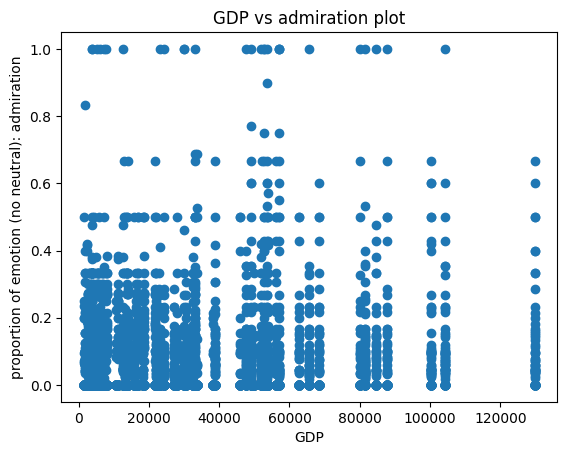

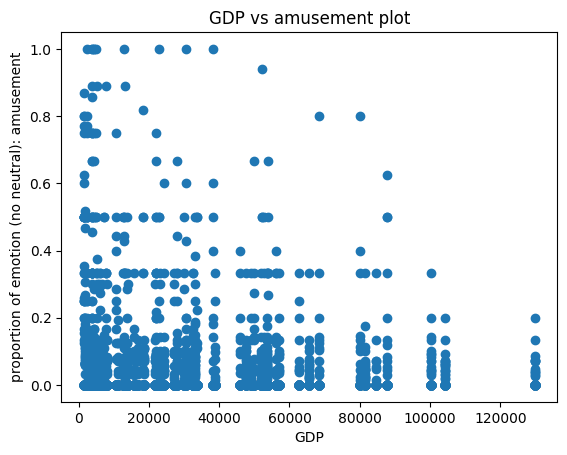

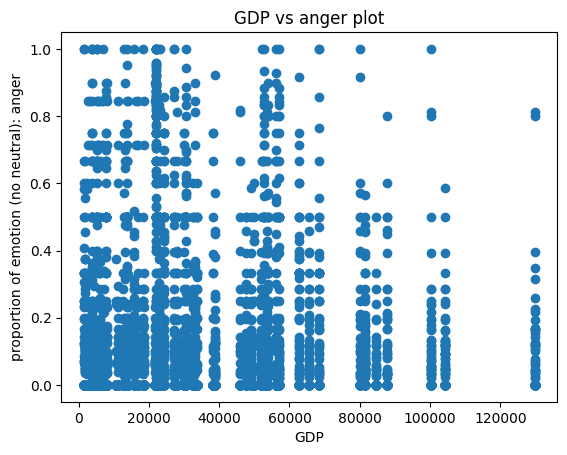

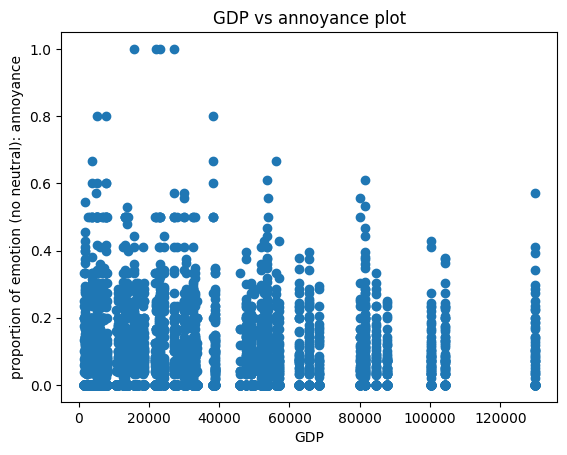

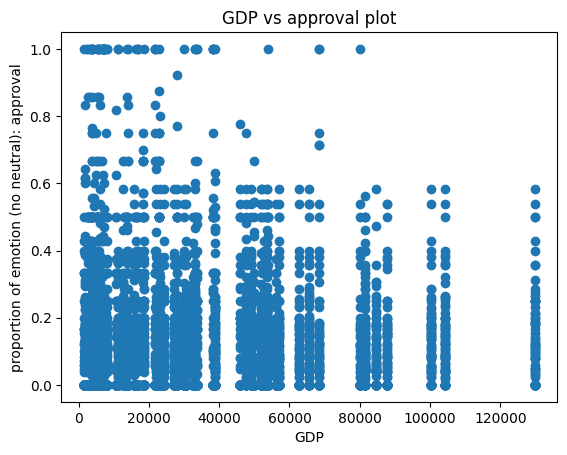

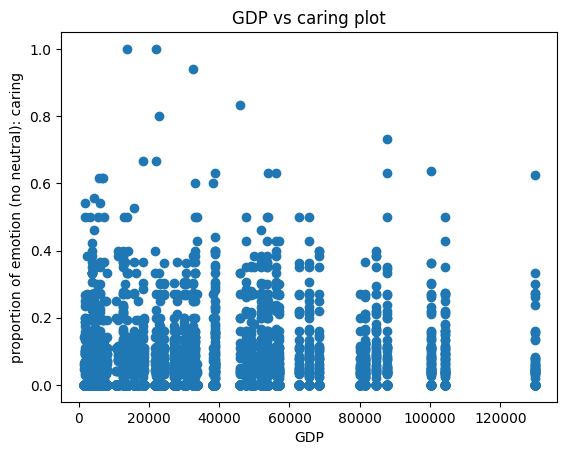

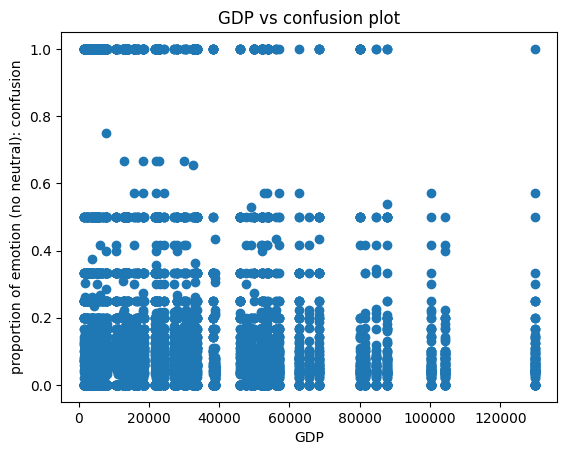

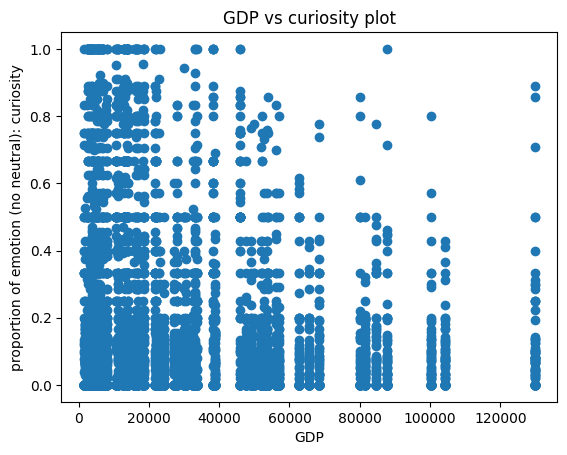

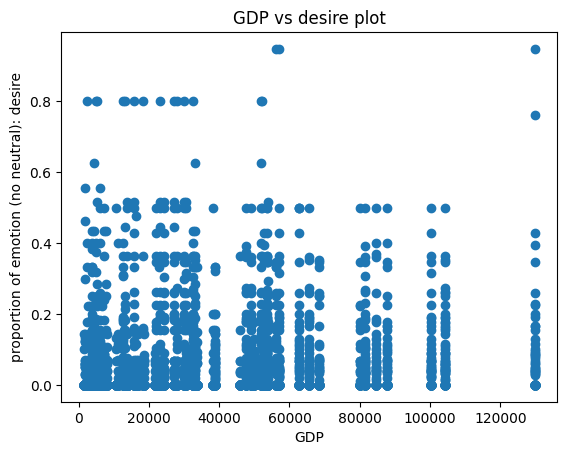

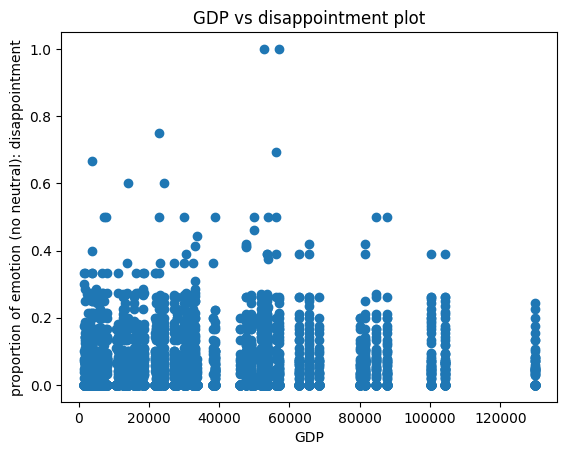

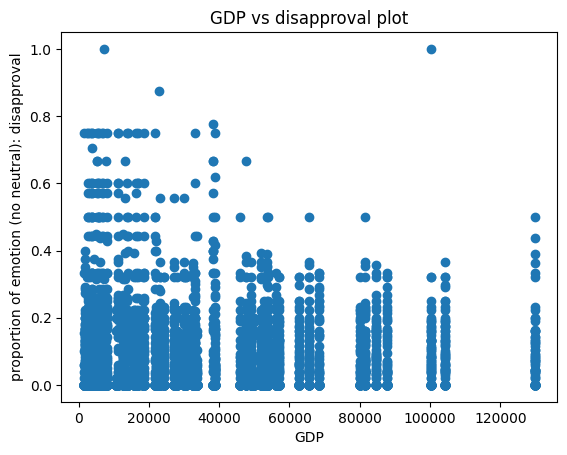

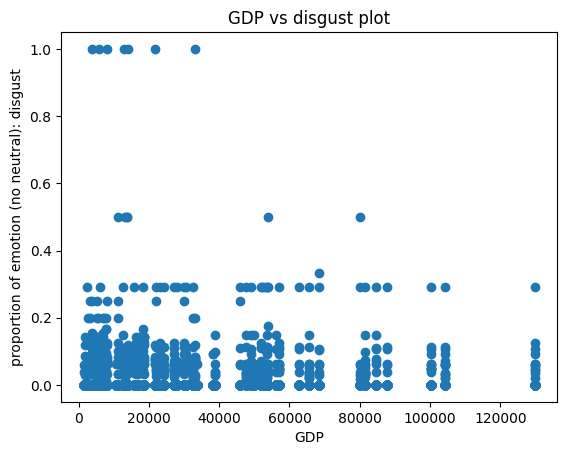

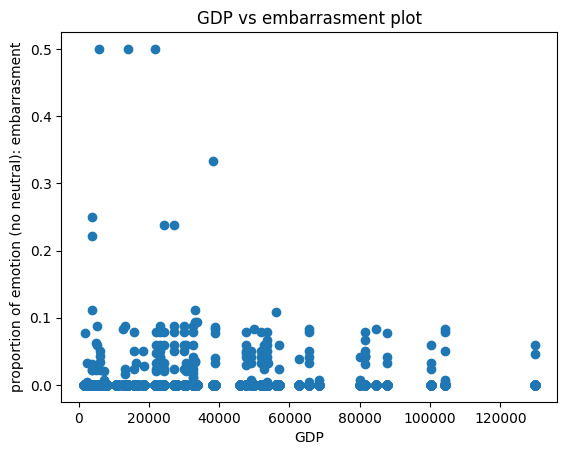

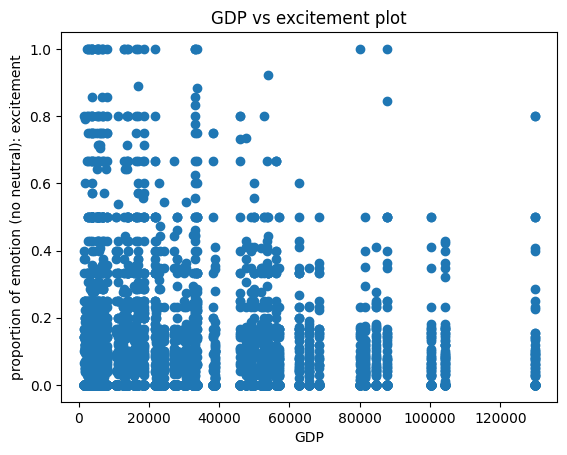

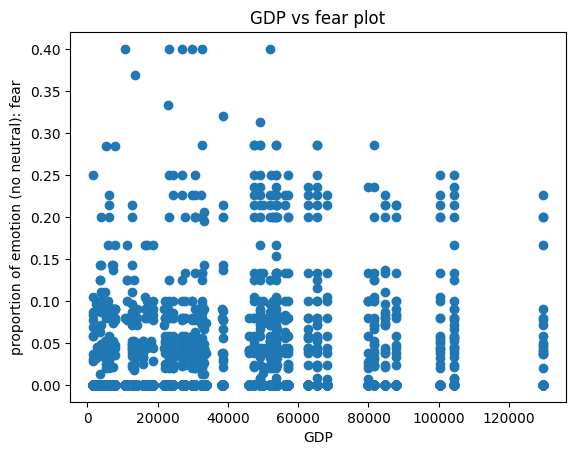

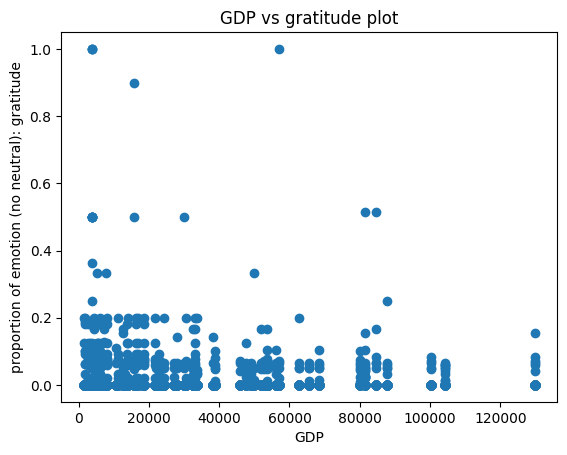

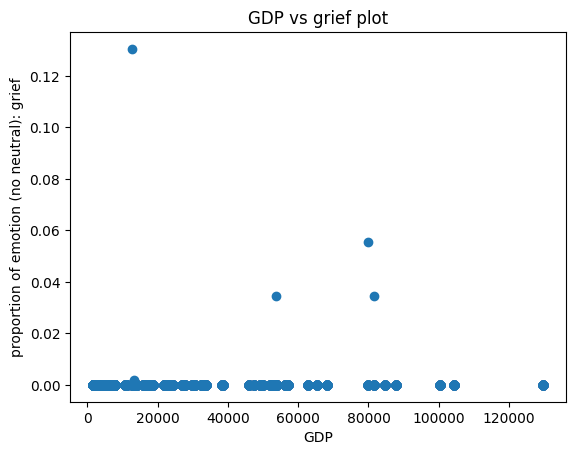

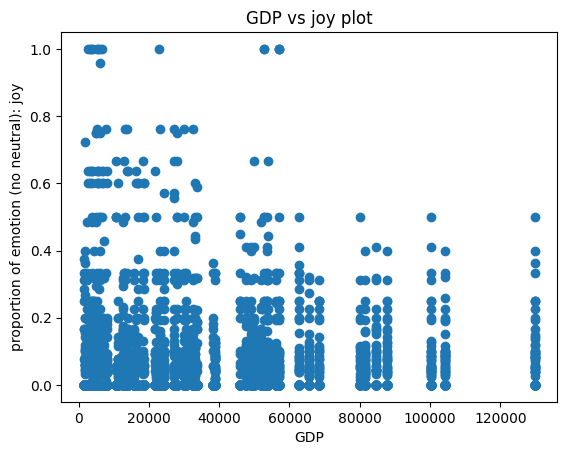

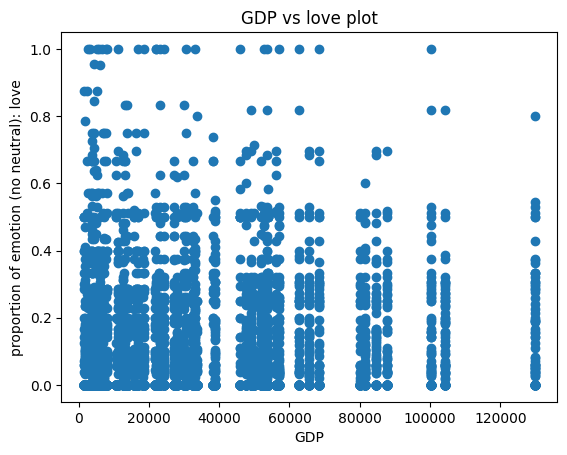

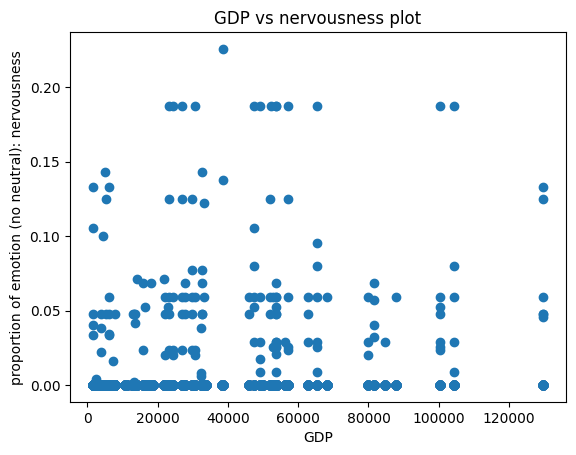

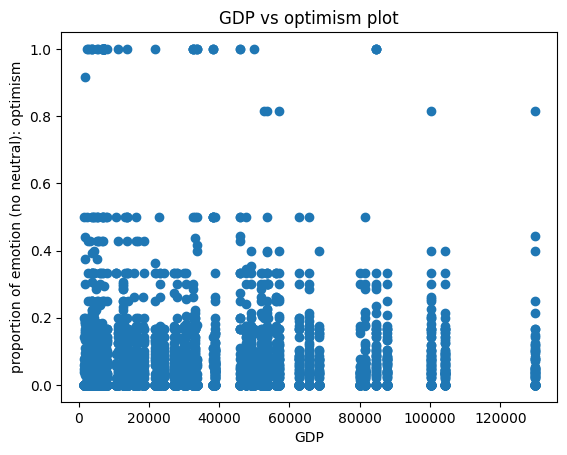

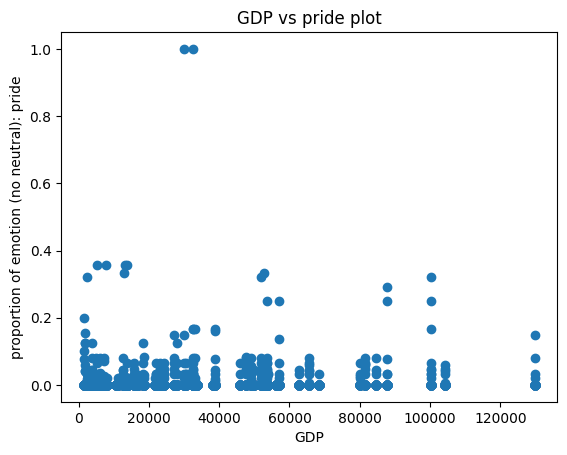

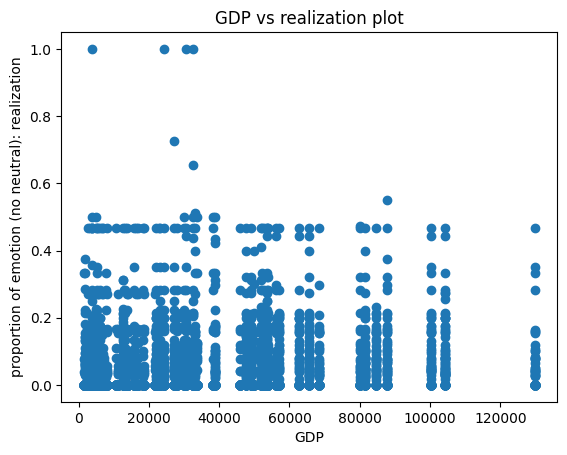

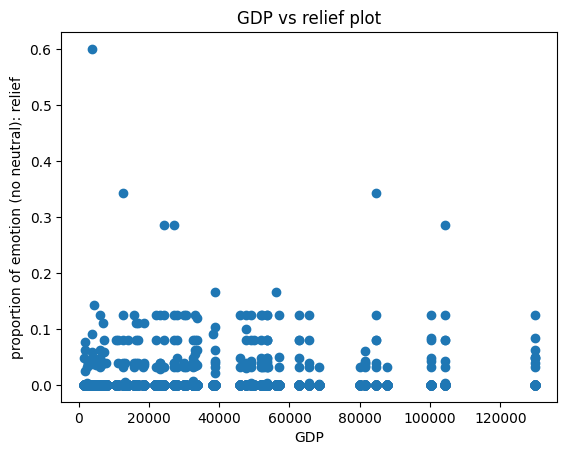

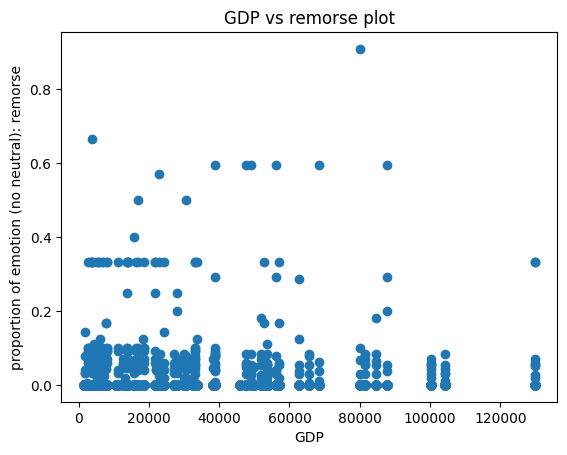

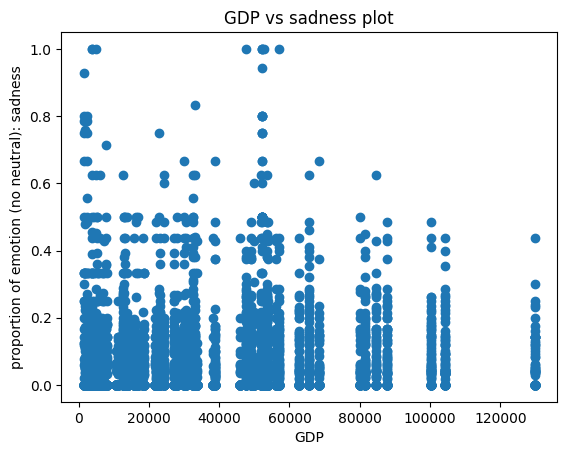

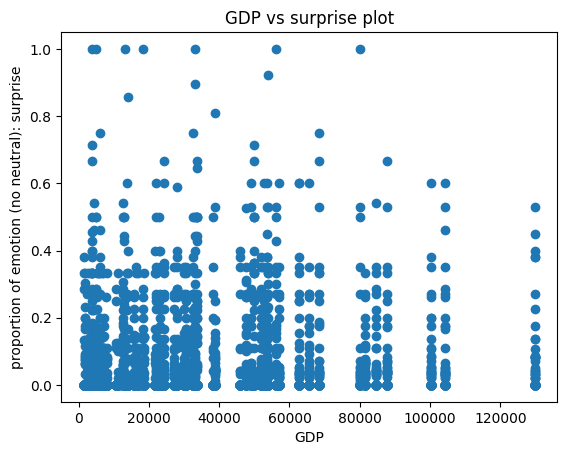

In [33]:
emotions_cache = {}

for i, emotion in enumerate(id2label[:len(id2label)-1]): # remove "neutral"
    x = [] # gdp data
    y = [] # proportion of emotion

    for country in all_countries:
        filename = f"data/emotions/emotions_{country}.csv"
        df = pd.read_csv(filename)
        df = df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)

        for j, row in df.iterrows():
            artist_title = row["artist_title"]        
            if artist_title not in emotions_cache:
                raw_emotions = row["emotions"]
                emotions = ast.literal_eval(raw_emotions)

                emotions_vector = aggregate_emotions_no_neutral(emotions)

                x.append(float(gdp_map[country]))
                y.append(emotions_vector[i])

                # save to cache
                emotions_cache[artist_title] = emotions_vector
            else:
                x.append(float(gdp_map[country]))
                y.append(emotions_cache[artist_title][i])

    plt.scatter(x, y)
    plt.title(f"GDP vs {emotion} plot")
    plt.xlabel("GDP")
    plt.ylabel(f"proportion of emotion (no neutral): {emotion}")
    
    plt.savefig(f"plots/gdp_emotions_more/{emotion}.png")
    plt.show()

In [36]:
np.save("data/saved/vector_no_neutral_cache.npy", emotions_cache, allow_pickle=True)

In [41]:
test = np.load("data/saved/vector_no_neutral_cache.npy", allow_pickle=True)


dict